# 1. 실험 준비

## 1-1. 라이브러리 선언

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.util import data_split, get_label, ECG_metrics, PPG_metrics, process_subject_PTT, process_biosignals_rr_si, process_biosignals_gsr, save_joined_features, load_subject_data, process_labels, get_corr

## 1-2. Subject list 및 예시 Subject 선언

In [2]:
subject_list =[
 '1_1_013_V1',
 '1_2_013_V1',
 '1_1_015_V1',
 '1_1_011_V1',
 '1_1_022_V1',
 '1_1_027_V1',
 '1_1_029_V1',
 '1_1_021_V1',
 '1_2_006_V1',
 '1_1_014_V2',
 '1_1_012_V1',
 ]

# 예시 Subject
subject = '1_1_013_V1'

# 2. Raw 데이터 준비
## 2-1. 데이터 분할 (Data Split)

In [3]:
raw_data_dir = '../data/raw_data/'
split_save_dir = '../data/split_data/'

for subject_name in subject_list:
    data_split(raw_data_dir+subject_name, split_save_dir+subject_name)

data_split_result = pd.read_csv('../data/split_data/'+subject+'/ECG/high/high1.csv')
data_split_result

../data/raw_data/1_1_013_V1 데이터 Split 처리 시작
../data/split_data/1_1_013_V1폴더에 Split데이터를 저장했습니다.

../data/raw_data/1_2_013_V1 데이터 Split 처리 시작
../data/split_data/1_2_013_V1폴더에 Split데이터를 저장했습니다.

../data/raw_data/1_1_015_V1 데이터 Split 처리 시작
../data/split_data/1_1_015_V1폴더에 Split데이터를 저장했습니다.

../data/raw_data/1_1_011_V1 데이터 Split 처리 시작
../data/split_data/1_1_011_V1폴더에 Split데이터를 저장했습니다.

../data/raw_data/1_1_022_V1 데이터 Split 처리 시작
../data/split_data/1_1_022_V1폴더에 Split데이터를 저장했습니다.

../data/raw_data/1_1_027_V1 데이터 Split 처리 시작
../data/split_data/1_1_027_V1폴더에 Split데이터를 저장했습니다.

../data/raw_data/1_1_029_V1 데이터 Split 처리 시작
../data/split_data/1_1_029_V1폴더에 Split데이터를 저장했습니다.

../data/raw_data/1_1_021_V1 데이터 Split 처리 시작
../data/split_data/1_1_021_V1폴더에 Split데이터를 저장했습니다.

../data/raw_data/1_2_006_V1 데이터 Split 처리 시작
../data/split_data/1_2_006_V1폴더에 Split데이터를 저장했습니다.

../data/raw_data/1_1_014_V2 데이터 Split 처리 시작
../data/split_data/1_1_014_V2폴더에 Split데이터를 저장했습니다.

../data/raw_data/1_1_012_V1 데이터 Split 처리

,Shimmer_820D_Timestamp_Unix_CAL,Shimmer_820D_ECG_EMG_Status1_CAL,Shimmer_820D_ECG_EMG_Status2_CAL,Shimmer_820D_ECG_LA-RA_24BIT_CAL,Shimmer_820D_ECG_LL-LA_24BIT_CAL,Shimmer_820D_ECG_LL-RA_24BIT_CAL,Shimmer_820D_ECG_Vx-RL_24BIT_CAL,Unnamed: 7
0,1.753682e+12,128.0,128.0,-3.067982,10.915032,7.847050,-11.923797,NaN
1,1.753682e+12,128.0,128.0,-3.088825,10.879620,7.790795,-11.896318,NaN
2,1.753682e+12,128.0,128.0,-3.079089,10.890871,7.811782,-11.912474,NaN
3,1.753682e+12,128.0,128.0,-3.082623,10.910993,7.828370,-11.933894,NaN
4,1.753682e+12,128.0,128.0,-3.081901,10.930393,7.848492,-11.955025,NaN
...,...,...,...,...,...,...,...,...
25784,1.753682e+12,128.0,128.0,-2.806469,11.046942,8.240473,-11.922354,NaN
25785,1.753682e+12,128.0,128.0,-2.811229,11.086248,8.275019,-11.916080,NaN
25786,1.753682e+12,128.0,128.0,-2.816854,11.113655,8.296800,-11.939519,NaN
25787,1.753682e+12,128.0,128.0,-2.817359,11.126204,8.308844,-11.957261,NaN


## 2-2. Data Label Generation

In [4]:
base_dir = r'../data/raw_data/'
sam_result_path = r'../data/SAM/'
save_dir = '../features/label/'
Label_result = get_label(base_dir=base_dir+subject, sam_result_path=sam_result_path, subject_path=subject, output_dir=save_dir)
Label_result

../data/raw_data/1_1_013_V1 Label 정보 처리 시작
../features/label/1_1_013_V1.csv에 Label 정보를 저장했습니다.



,File,label-3.5_more,label-3.5_over,label-avg,Q1,Q2
0,low1.csv,0,0,1.5,2,1
1,low2.csv,0,0,0.0,0,0
2,low3.csv,1,1,4.0,5,3
3,low4.csv,0,0,0.5,1,0
4,low5.csv,0,0,0.0,0,0
5,mid1.csv,0,0,0.0,0,0
6,mid2.csv,1,0,3.5,3,4
7,mid3.csv,1,1,5.0,5,5
8,mid4.csv,0,0,1.5,2,1
9,mid5.csv,0,0,0.0,0,0


# 3. 생체신호 특징 추출
## 3-1. ECG, PPG HR_HRV
### 3-1-1. ECG HR_HRV

In [5]:
split_data_dir = r"..\data\split_data"
save_path = "..\\features\\HR_HRV\\ECG\\"+subject
# Save
ECG_HR_HRV_result = ECG_metrics(os.path.join(split_data_dir, subject)+"\\ECG", save_path=save_path)
ECG_HR_HRV_result

..\data\split_data\1_1_013_V1\ECG ECG Signal - HR, HRV 분석 시작
..\features\HR_HRV\ECG\1_1_013_V1\1_1_013_V1.csv에 ECG Signal - HR, HRV 분석 결과를 저장했습니다.


,File,channel,HR,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,end1.csv,LA_RA,68.316180,878.335337,32.799860,NaN,NaN,NaN,NaN,NaN,...,1.704748,5.121917,1.422351,0.628920,0.000000,0.000000,1.915585,1.912368,2.916754,1.111822
1,end1.csv,LL_LA,68.316515,878.335337,32.964813,NaN,NaN,NaN,NaN,NaN,...,1.609438,5.256607,1.410385,0.605092,0.000000,0.000000,2.151761,1.914093,2.902393,1.019170
2,end1.csv,LL_RA,68.313891,878.365385,32.853941,NaN,NaN,NaN,NaN,NaN,...,1.832581,5.108767,1.378356,0.660878,0.000000,0.000000,2.055156,1.912805,2.935134,1.111822
3,end1.csv,Vx_RL,68.314404,878.365385,33.020428,NaN,NaN,NaN,NaN,NaN,...,2.120264,5.039686,1.400972,0.732798,0.920243,1.083715,2.492167,1.914851,2.879737,1.019170
4,high1.csv,LA_RA,68.258455,879.534040,25.438676,NaN,NaN,NaN,NaN,NaN,...,2.140066,5.144508,1.550912,0.000000,0.881590,0.937376,1.900499,1.993916,2.519062,1.348136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,mid5.csv,Vx_RL,67.816652,885.564631,35.703104,NaN,NaN,NaN,NaN,NaN,...,inf,3.879664,1.667420,NaN,NaN,NaN,2.206435,2.016757,2.048283,1.216209
64,start1.csv,LA_RA,67.580294,888.281250,36.255006,NaN,NaN,NaN,NaN,NaN,...,2.833213,5.291448,1.352448,1.531554,0.708303,0.982956,2.298601,1.905935,3.284189,1.204474
65,start1.csv,LL_LA,67.583469,888.251202,36.222591,NaN,NaN,NaN,NaN,NaN,...,1.945910,5.298990,1.353296,1.383670,0.690522,1.043900,1.979011,1.907364,3.155274,1.297125
66,start1.csv,LL_RA,67.583638,888.251202,36.148468,NaN,NaN,NaN,NaN,NaN,...,1.749200,5.218296,1.326198,1.377565,0.753631,1.004311,1.976928,1.907178,3.195341,1.204474


## 3-1-2. PPG HR_HRV

In [6]:
split_data_dir = r"..\data\split_data"
save_path = "..\\features\\HR_HRV\\PPG\\"+subject
# Save
PPG_HR_HRV_result = PPG_metrics(os.path.join(split_data_dir, subject)+"\\PPG", save_path=save_path)
PPG_HR_HRV_result

..\data\split_data\1_1_013_V1\PPG PPG Signal - HR, HRV 분석 시작
..\features\HR_HRV\PPG\1_1_013_V1\1_1_013_V1.csv에 PPG Signal - HR, HRV 분석 결과를 저장했습니다.


,File,channel,HR,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,end1.csv,ppg,68.255887,879.206731,40.778400,NaN,NaN,NaN,NaN,NaN,...,2.047693,2.980479,1.607802,0.858497,0.806587,0.887943,1.421742,1.968554,3.839767,1.297125
1,high1.csv,ppg,68.491807,877.162388,57.491622,NaN,NaN,NaN,NaN,NaN,...,1.856298,2.986513,1.267676,0.955161,0.981966,0.983935,1.604632,2.119458,2.378316,1.037028
2,high2.csv,ppg,69.402079,864.894701,40.272712,NaN,NaN,NaN,NaN,NaN,...,1.791759,2.970476,1.473725,0.000000,0.000000,0.000000,1.102299,1.767167,2.644362,1.200774
3,high3.csv,ppg,68.954036,870.361328,31.870658,NaN,NaN,NaN,NaN,NaN,...,1.945910,2.717582,1.591239,0.000000,1.267862,1.548319,0.820650,1.870336,3.307198,1.125000
4,high4.csv,ppg,69.381470,865.234375,33.771536,NaN,NaN,NaN,NaN,NaN,...,1.832581,2.748321,1.570608,0.655260,0.745969,0.732798,1.074766,2.019936,2.908857,1.015894
5,high5.csv,ppg,68.901251,871.221824,34.254696,NaN,NaN,NaN,NaN,NaN,...,3.663562,2.726554,1.715153,1.291910,1.622576,1.866654,0.960086,1.947502,2.933198,1.166702
6,low1.csv,ppg,65.593737,915.364583,38.640910,NaN,NaN,NaN,NaN,NaN,...,1.163151,2.941303,1.681230,0.000000,0.638914,1.057408,0.897542,1.963342,2.998171,0.984482
7,low2.csv,ppg,64.780805,926.846591,35.241227,NaN,NaN,NaN,NaN,NaN,...,1.704748,2.801485,1.623147,0.000000,0.000000,0.000000,0.776690,2.015676,3.686925,0.917163
8,low3.csv,ppg,67.422535,890.136719,29.632988,NaN,NaN,NaN,NaN,NaN,...,1.734601,2.580309,1.699815,0.000000,0.000000,0.000000,0.720395,2.049483,2.978631,1.330482
9,low4.csv,ppg,64.553273,929.827009,36.185770,NaN,NaN,NaN,NaN,NaN,...,2.079442,2.792842,1.388558,0.000000,0.000000,0.000000,0.715985,1.960842,2.880788,1.201839


## 3-2. PTT Calculate

In [7]:
save_dir = r"../features/PTT"
split_data_dir = r"../data/split_data"

PTT_result = process_subject_PTT(os.path.join(split_data_dir, subject), subject, save_path=save_dir)
PTT_result

../data/split_data\1_1_013_V1 PTT 분석 시작
../features/PTT\1_1_013_V1.csv에 PTT 계산 결과를 저장했습니다.


,Subject,File,LA-RA_PTT_avg,LA-RA_PTT_std,LL-LA_PTT_avg,LL-LA_PTT_std,LL-RA_PTT_avg,LL-RA_PTT_std,Vx-RL_PTT_avg,Vx-RL_PTT_std
0,1_1_013_V1,start1.csv,340.083600,4.407585,333.292862,4.271172,334.825323,4.139106,362.980354,4.350237
1,1_1_013_V1,low1.csv,339.779213,4.624225,332.831328,4.656645,334.368197,4.540194,362.000131,4.485834
2,1_1_013_V1,low2.csv,337.602912,4.344901,330.939471,4.107684,332.490412,4.291142,360.351176,4.296171
3,1_1_013_V1,low3.csv,338.842976,6.917064,332.126000,6.569793,333.698098,6.478600,361.613415,6.362814
4,1_1_013_V1,low4.csv,338.159552,3.759540,331.626862,3.676433,333.310483,3.526572,361.395172,3.571411
5,1_1_013_V1,low5.csv,339.572083,7.732835,332.844528,7.666992,334.363694,7.796393,362.466972,7.499407
6,1_1_013_V1,mid1.csv,340.417676,6.364708,333.754176,6.262354,335.247647,6.210491,363.510588,6.190162
7,1_1_013_V1,mid2.csv,337.134129,28.306423,330.770774,28.505141,331.463806,28.503708,359.846034,6.357958
8,1_1_013_V1,mid3.csv,338.491115,7.120103,331.767904,7.083976,333.232769,7.218519,361.102308,6.880410
9,1_1_013_V1,mid4.csv,338.183150,6.922066,333.535607,16.142309,335.200656,16.183961,361.327650,6.737587


## 3-3. Stress Index(SI) & Respiratory Rate(RR) Calculate

In [8]:
save_dir = r"../features/"
split_data_dir = r"../data/split_data/"
_ = process_biosignals_rr_si(split_data_dir+subject+r'\\ECG', 'ECG', save_path=save_dir)
_ = process_biosignals_rr_si(split_data_dir+subject+r'\\PPG', 'PPG', save_path=save_dir)

RR_ECG_result = pd.read_csv(r'..\features\RR\ECG\\'+subject+'\\'+subject+r'.csv')
RR_PPG_result = pd.read_csv(r'..\features\RR\PPG\\'+subject+'\\'+subject+r'.csv')

SI_ECG_result = pd.read_csv(r'..\features\SI\ECG\\'+subject+'\\'+subject+r'.csv')
SI_PPG_result = pd.read_csv(r'..\features\SI\PPG\\'+subject+'\\'+subject+r'.csv')

../data/split_data/1_1_013_V1\\ECG ECG Signal - SI, RR 분석 시작
../features/RR\ECG\1_1_013_V1\1_1_013_V1.csv에 ECG Signal - RR 분석 결과를 저장했습니다.
../features/RR\ECG\1_1_013_V1\1_1_013_V1.csv에 ECG Signal - SI 분석 결과를 저장했습니다.

../data/split_data/1_1_013_V1\\PPG PPG Signal - SI, RR 분석 시작
../features/RR\PPG\1_1_013_V1\1_1_013_V1.csv에 PPG Signal - RR 분석 결과를 저장했습니다.
../features/RR\PPG\1_1_013_V1\1_1_013_V1.csv에 PPG Signal - SI 분석 결과를 저장했습니다.



In [9]:
RR_ECG_result

,File,LA_RA_rr,LL_LA_rr,LL_RA_rr,Vx_RL_rr
0,end1.csv,11.921961,11.921961,11.921961,11.921961
1,high1.csv,14.402701,14.402701,14.402701,14.402701
2,high2.csv,9.702351,9.702351,9.702351,15.621311
3,high3.csv,15.273137,15.229615,15.229615,15.229615
4,high4.csv,15.142571,15.142571,15.142571,15.142571
5,high5.csv,14.620310,14.620310,14.620310,14.620310
6,low1.csv,13.532266,13.532266,13.575788,13.575788
7,low2.csv,15.708354,15.708354,15.708354,15.708354
8,low3.csv,14.837919,14.837919,14.837919,14.837919
9,low4.csv,13.314657,13.314657,13.271136,13.271136


In [10]:
RR_PPG_result

,File,ppg_rr
0,end1.csv,11.791396
1,high1.csv,23.324662
2,high2.csv,15.708354
3,high3.csv,15.186093
4,high4.csv,13.010005
5,high5.csv,14.489745
6,low1.csv,13.619310
7,low2.csv,15.621311
8,low3.csv,14.794397
9,low4.csv,13.314657


In [11]:
SI_ECG_result

,File,LA_RA_si,LL_LA_si,LL_RA_si,Vx_RL_si
0,end1.csv,4.741152,4.062545,5.196253,5.280281
1,high1.csv,6.688730,5.875517,5.136973,5.088347
2,high2.csv,4.867853,5.537522,4.850194,5.505233
3,high3.csv,4.652303,5.310435,4.593915,4.714621
4,high4.csv,5.831571,5.645399,6.654645,6.461310
5,high5.csv,6.491961,4.549060,5.338937,5.357358
6,low1.csv,4.477475,4.398435,5.100350,5.175699
7,low2.csv,7.058089,6.159324,7.112174,6.112484
8,low3.csv,4.092230,5.981047,6.861520,5.948664
9,low4.csv,6.757213,5.627475,5.584019,5.369727


In [12]:
SI_PPG_result

,File,ppg_si
0,end1.csv,8.073385
1,high1.csv,5.386590
2,high2.csv,8.535441
3,high3.csv,9.875414
4,high4.csv,9.276711
5,high5.csv,9.021694
6,low1.csv,8.784703
7,low2.csv,9.827545
8,low3.csv,10.896084
9,low4.csv,9.875414


## 3-4. GSR Feature

In [13]:
save_dir = r"../features/"
split_data_dir = r"../data/split_data/"

GSR_result = process_biosignals_gsr(split_data_dir+subject+r'\\PPG', save_path=save_dir)
GSR_result

../data/split_data/1_1_013_V1\\PPG GSR Signal - 분석 시작
Wrong signals: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Wrong signals: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Wrong signals: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Wrong signals: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Wrong signals: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Wrong signals: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Wrong signals: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Wrong signals: 

,File,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,EDA_Sympathetic,EDA_SympatheticN,EDA_Autocorrelation
0,low4.csv,27.0,0.056620,0.910437,NaN,NaN,NaN
1,mid2.csv,32.0,0.064547,0.912869,NaN,NaN,NaN
2,mid5.csv,24.0,0.127330,0.847006,NaN,NaN,NaN


# 4. 분석 데이터 준비
## 4-1. Feature Integration

In [14]:
try:
    save_joined_features(subject)
    joined_df, label_df = load_subject_data(fname = subject+'.csv')
except Exception as e:
    print(e)
joined_df

1_1_013_V1 추출한 특징 파일 병합 시작
../features/joined\1_1_013_V1.csv에 병합된 특징 CSV 파일을 저장하였습니다.

1_1_013_V1.csv 특징과 Label을 로드합니다.


,File,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,EDA_Sympathetic,EDA_SympatheticN,EDA_Autocorrelation,LA_RA_HR,LL_LA_HR,LL_RA_HR,...,LA_RA_rr,LL_LA_rr,LL_RA_rr,Vx_RL_rr,ppg_rr,LA_RA_si,LL_LA_si,LL_RA_si,Vx_RL_si,ppg_si
0,low1.csv,NaN,NaN,NaN,NaN,NaN,NaN,65.603961,65.603566,65.602814,...,13.532266,13.532266,13.575788,13.575788,13.619310,4.477475,4.398435,5.100350,5.175699,8.784703
1,low2.csv,NaN,NaN,NaN,NaN,NaN,NaN,64.827411,64.828799,64.828593,...,15.708354,15.708354,15.708354,15.708354,15.621311,7.058089,6.159324,7.112174,6.112484,9.827545
2,low3.csv,NaN,NaN,NaN,NaN,NaN,NaN,67.506031,67.411441,67.416402,...,14.837919,14.837919,14.837919,14.837919,14.794397,4.092230,5.981047,6.861520,5.948664,10.896084
3,low4.csv,27.0,0.056620,0.910437,NaN,NaN,NaN,64.645788,64.644224,64.644672,...,13.314657,13.314657,13.271136,13.271136,13.314657,6.757213,5.627475,5.584019,5.369727,9.875414
4,low5.csv,NaN,NaN,NaN,NaN,NaN,NaN,65.985932,65.985085,65.985578,...,10.311656,10.311656,10.311656,10.311656,13.488744,5.166019,5.234163,5.211843,5.234163,8.387809
5,mid1.csv,NaN,NaN,NaN,NaN,NaN,NaN,67.118491,67.113766,67.118592,...,14.141571,14.141571,14.141571,14.141571,14.228614,5.055110,7.211446,5.131956,5.131956,10.380274
6,mid2.csv,32.0,0.064547,0.912869,NaN,NaN,NaN,69.689934,69.704501,69.710862,...,15.316658,15.316658,15.229615,10.050525,14.750875,3.535640,3.975539,3.968646,4.251811,15.459017
7,mid3.csv,NaN,NaN,NaN,NaN,NaN,NaN,67.657637,67.509061,67.511825,...,14.272136,14.272136,14.272136,14.272136,14.141571,3.802483,5.626591,5.575206,5.631681,10.087813
8,mid4.csv,NaN,NaN,NaN,NaN,NaN,NaN,66.395264,66.392922,66.395512,...,14.141571,14.141571,14.141571,14.141571,14.228614,4.945994,4.325028,4.945994,4.255452,5.904200
9,mid5.csv,24.0,0.127330,0.847006,NaN,NaN,NaN,67.804284,67.809305,67.808782,...,13.706353,13.706353,13.706353,13.706353,13.532266,6.238255,6.112484,6.245091,7.430984,9.724636


## 4-2. Label 처리

In [15]:
processed_label_df = process_labels(label_df = label_df)
processed_label_df

Label 계산 완료


,File,label
0,low1.csv,1.5
1,low2.csv,0.0
2,low3.csv,4.0
3,low4.csv,0.5
4,low5.csv,0.0
5,mid1.csv,0.0
6,mid2.csv,3.5
7,mid3.csv,5.0
8,mid4.csv,1.5
9,mid5.csv,0.0


# 상관성 분석
## 5-1. 상관계수 계산

In [16]:
corr_df = get_corr(file_list= subject_list, cut_bins= None)
corr_df

1_1_011_V1.csv 특징과 Label을 로드합니다.
1_1_012_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_013_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_014_V2.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_015_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_021_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_022_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_027_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_029_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_2_006_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_2_013_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료


,1_1_012_V1,1_1_013_V1,1_1_014_V2,1_1_015_V1,1_1_021_V1,1_1_022_V1,1_1_027_V1,1_1_029_V1,1_2_006_V1,1_2_013_V1,mean_corr
SCR_Peaks_N,-0.456269,NaN,-0.151646,0.009008,0.173500,0.304920,0.043159,0.041980,-0.185331,0.001412,-0.024363
SCR_Peaks_Amplitude_Mean,0.351001,NaN,0.255485,0.084805,0.112308,-0.090166,0.175425,0.012874,-0.180784,-0.678865,0.004676
EDA_Tonic_SD,-0.402175,NaN,-0.210354,0.221124,-0.484598,0.330612,-0.519956,-0.156991,0.251542,-0.541019,-0.167979
EDA_Sympathetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDA_SympatheticN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
ppg_HRV_MFDFA_alpha2_Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ppg_HRV_MFDFA_alpha2_Delta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ppg_HRV_MFDFA_alpha2_Asymmetry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ppg_HRV_MFDFA_alpha2_Fluctuation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5-2. 결과 시각화
---
### Function plot_feature_group
##### - 상관계수 DataFrame(corr_df)에서 특정 feature 그룹을 추출해 heatmap으로 시각화.
- Args:
    - corr_df (pd.DataFrame): feature × subject correlation 테이블.
    - keywords (list[str]): feature 이름에서 검색할 키워드 리스트.
    - title (str): 플롯 제목.
    - Top (int | None): 상위 N개의 feature만 표시 (None이면 전체).
    - threshold (float): 값 강조 표시를 위한 기준치 (절댓값 기준).
    - sort (bool): column_name 기준으로 정렬 여부.
    - column_name (str): 표시 기준 컬럼 ("mean_corr"). 

In [17]:
def plot_feature_group(corr_df, keywords, title, Top=None, threshold=0.6, sort=True, column_name="mean_corr"):
    """
    상관계수 DataFrame(corr_df)에서 특정 feature 그룹을 추출해 heatmap으로 시각화.

    Args:
        corr_df (pd.DataFrame): feature × subject correlation 테이블.
        keywords (list[str]): feature 이름에서 검색할 키워드 리스트.
        title (str): 플롯 제목.
        Top (int | None): 상위 N개의 feature만 표시 (None이면 전체).
        threshold (float): 값 강조 표시를 위한 기준치 (절댓값 기준).
        sort (bool): column_name 기준으로 정렬 여부.
        column_name (str): 표시 기준 컬럼 (default: "mean_corr").
    """

    # -------------------- (1) 키워드 기반 feature 선택 (예: "ECG", "PPG" 같은 부분 문자열 검색) --------------------
    features = [f for f in corr_df.index if any(kw in f for kw in keywords)]
    subset = corr_df.loc[corr_df.index.intersection(features)]

    # -------------------- (2) column_name 기준 절댓값 내림차순 정렬 --------------------
    if sort and column_name in subset.columns:
        subset = subset.reindex(subset[column_name].abs().sort_values(ascending=False).index)

    # -------------------- (3) 상위 Top 개수만 선택 (예: Top=30 → 상위 30개 feature만 표시) --------------------
    if Top is not None:
        subset = subset.head(Top)

    # -------------------- (4) feature/subject 개수 및 NaN 통계 계산 --------------------
    total_features = len(subset)                             # 선택된 feature 수
    nan_features = subset[column_name].isna().sum()          # NaN 값 개수
    subject_cols = [c for c in subset.columns if c not in ["mean_corr", "optimal_mean_corr"]]
    total_subjects = len(subject_cols)                       # subject 수 (평균 제외)

    # -------------------- (5) heatmap 생성 (행=feature, 열=subject) --------------------
    plt.figure(figsize=(13, max(3, 1.5+len(subset)*0.25)),dpi= 600)   # feature 수에 따라 높이 자동 조절
    ax = sns.heatmap(subset, cmap="coolwarm", center=0, annot=False, cbar=True)

    # -------------------- (6) heatmap 셀 안에 값 표시 --------------------
    for y in range(subset.shape[0]):        # 각 feature(row)
        for x in range(subset.shape[1]):    # 각 subject/컬럼(column)
            val = subset.iloc[y, x]
            if pd.isna(val):                # NaN은 건너뜀
                continue
            # column_name (mean_corr)은 무조건 표시
            if subset.columns[x] == column_name:
                ax.text(x+0.5, y+0.5, f"{val:.2f}",
                        ha="center", va="center", color="black", fontsize=7, fontweight="bold")
            # threshold 이상(강한 양/음 상관관계)은 강조 표시
            elif val >= threshold or val <= -threshold:
                ax.text(x+0.5, y+0.5, f"{val:.2f}",
                        ha="center", va="center", color="black", fontsize=7, fontweight="bold")

    # -------------------- (7) 제목 설정 (feature 개수, subject 개수, NaN 개수 표시) --------------------
    plt.title(
        f"{title} (Features: {total_features}, Subjects: {total_subjects}, NaN: {nan_features})"
        if nan_features else
        f"{title} (Features: {total_features}, Subjects: {total_subjects})",
        fontsize=14
    )
    plt.xlabel("Subjects + Mean")  # X축: subject + mean_corr
    plt.ylabel("Features")         # Y축: feature 이름
    plt.tight_layout()
    plt.show()


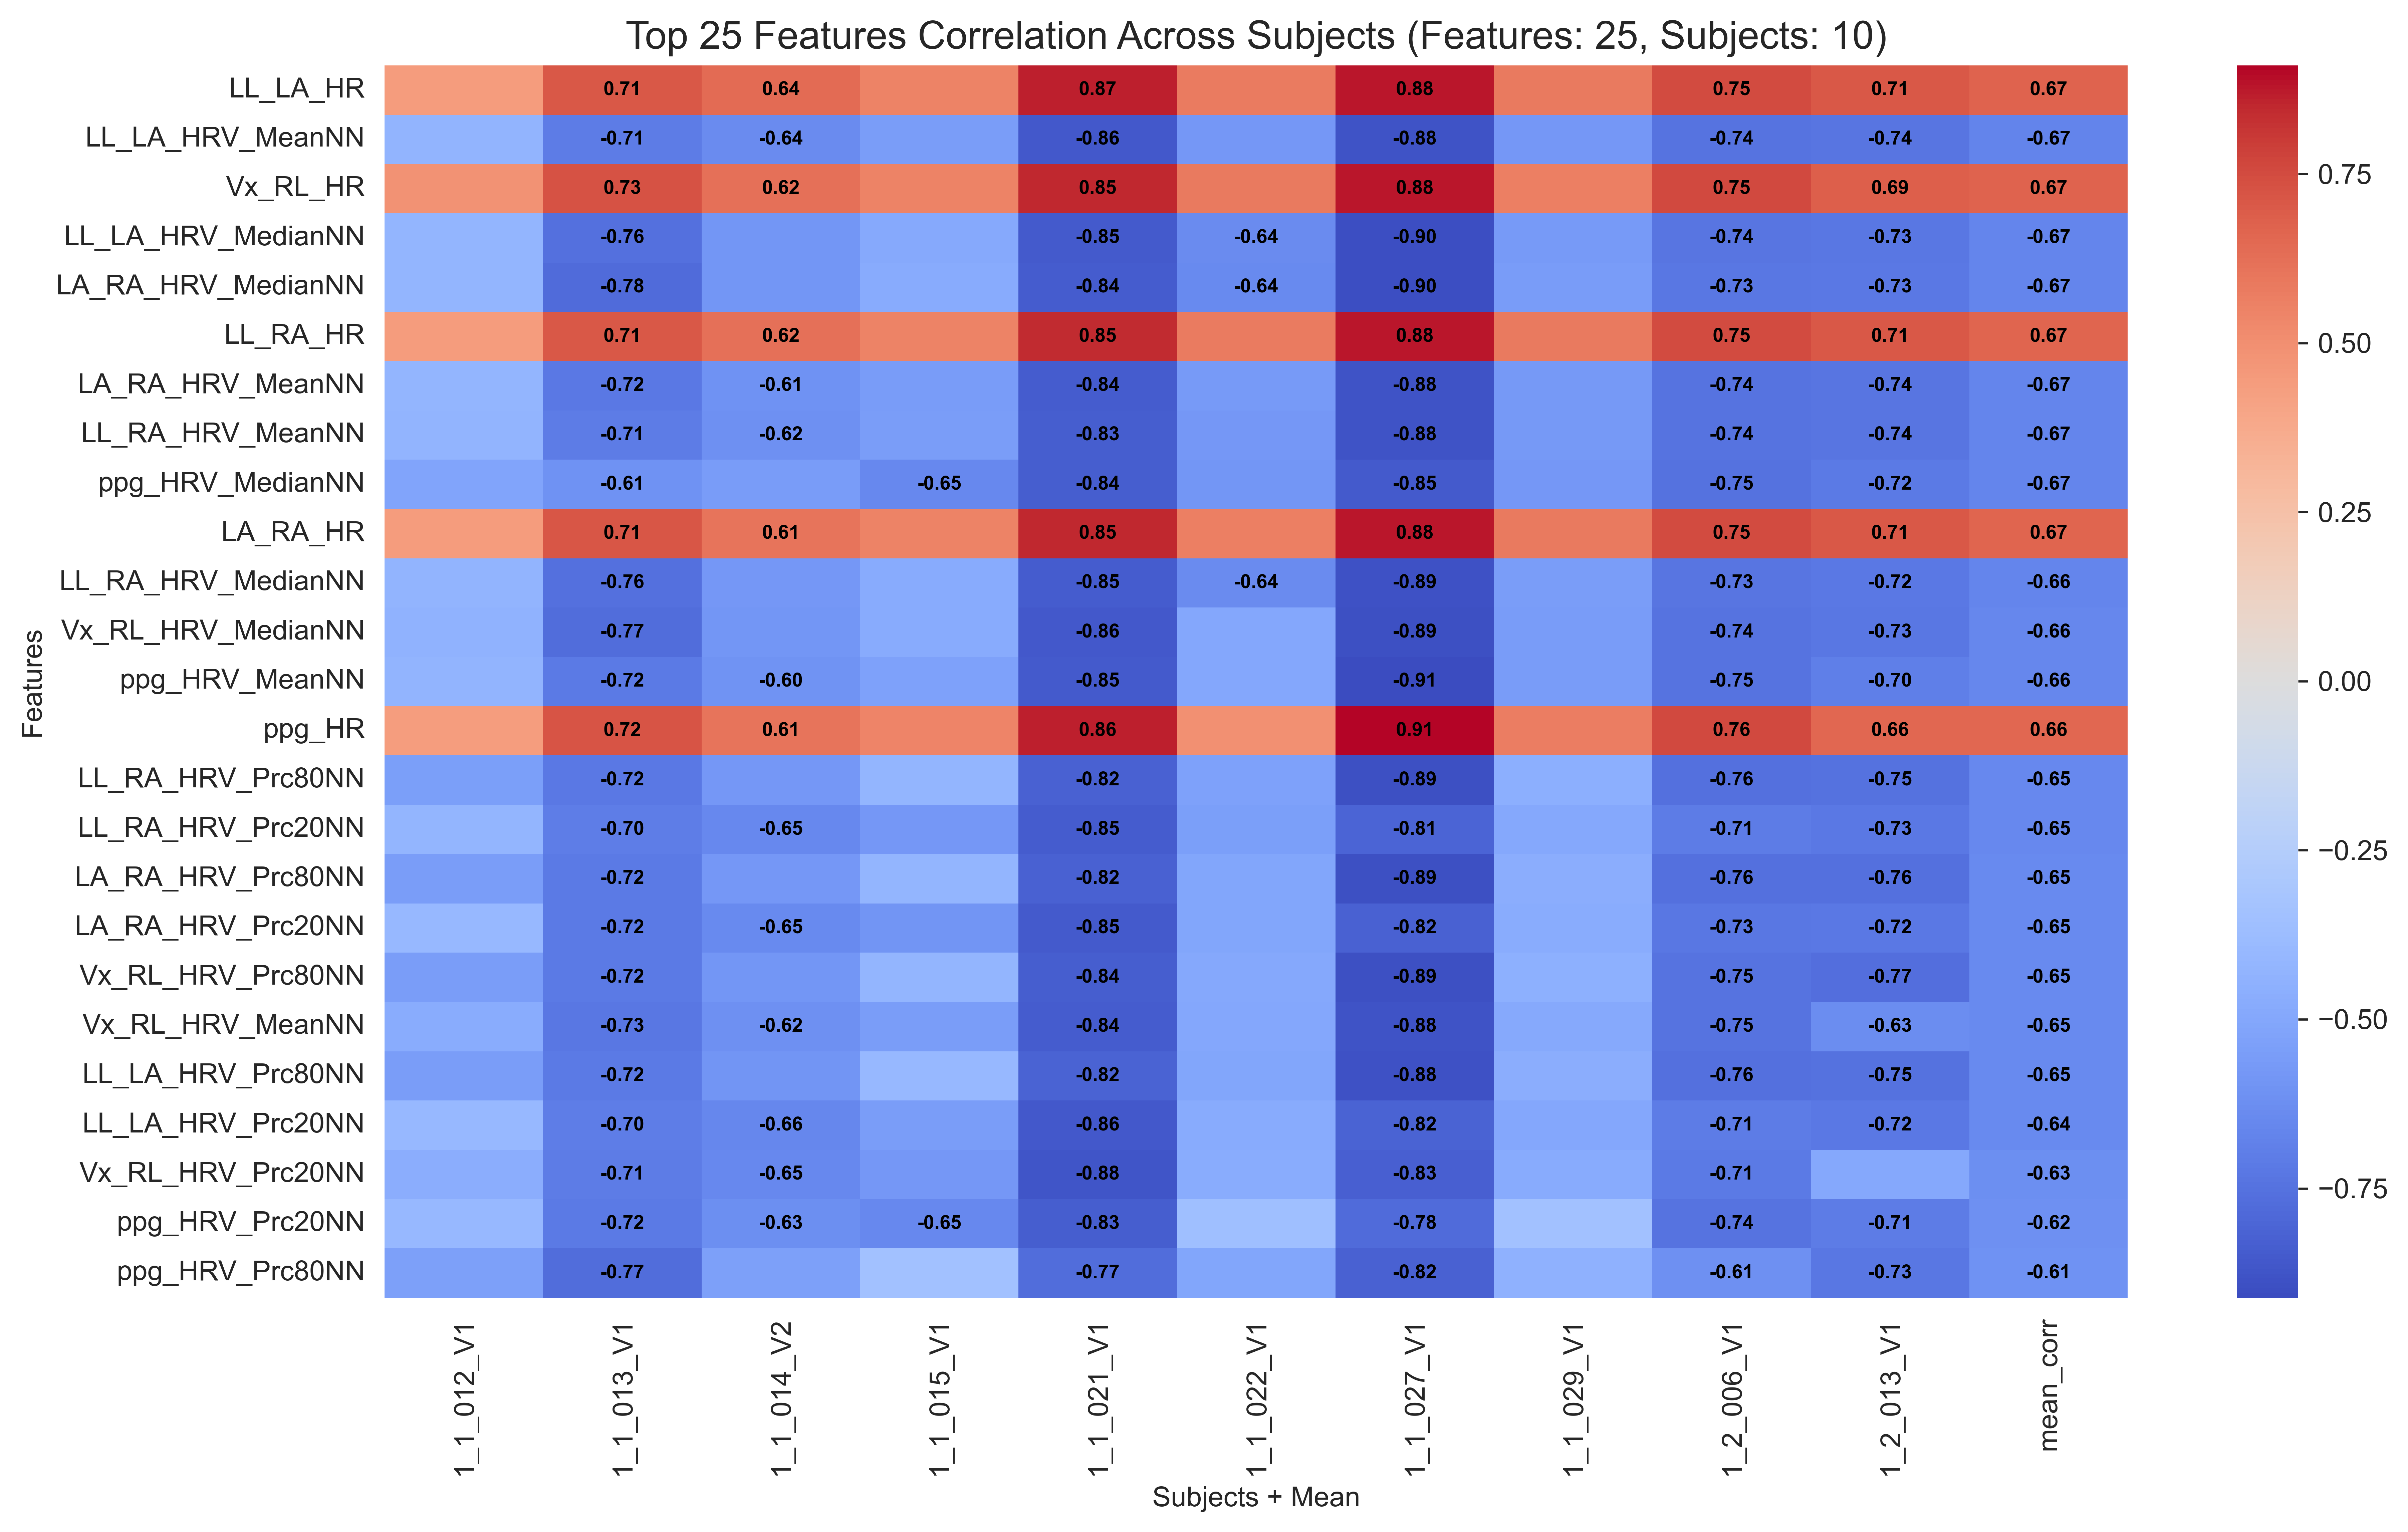

In [18]:
plot_feature_group(corr_df= corr_df, keywords= ["SCR","EDA","LA_RA","LL_LA","LL_RA","Vx_RL","ppg","PTT"], 
                   title= "Top 25 Features Correlation Across Subjects", Top= 25, column_name="mean_corr")